In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
#loading the iris data set
iris_data = datasets.load_iris()
list(iris_data)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [3]:
#Creating a new dataframe from the output of iris_data
iris_df = pd.DataFrame(data = iris_data.data,columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Creating a new dataframe from the output of iris_data.target

iris_target = pd.DataFrame(iris_data.target,columns=["Class"])
iris_target.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [5]:
#concatenating and creating an entire iris dataset
iris = pd.concat([iris_df,iris_target],axis = 1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
#Applying Principal Component Analysis technique to transform iris data into 3 dimensions

model = decomposition.PCA(n_components=3)
iris_PCA = model.fit_transform(iris.iloc[:,:4])

#Created a new Dataframe for the output of PCA technique
df = pd.DataFrame(iris_PCA)
df.head()

,0,1,2
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079


In [7]:
#concatenating the new Dataframe and the class column of iris dataset
df = pd.concat([df,iris["Class"]],axis=1)
df.head()

,0,1,2,Class
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


In [8]:
colors = {0:"green",1:"yellow",2:"red"}

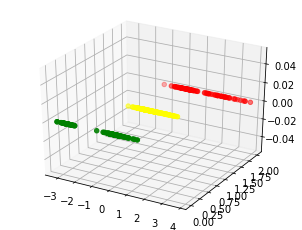

In [9]:
fig = plt.figure(figsize=(4, 3))
ax =Axes3D(fig)
ax.scatter(xs=df.iloc[:,0],ys=df.iloc[:,3],c=df["Class"].map(colors))
ax.scatter(xs=df.iloc[:,1],ys=df.iloc[:,3],c=df["Class"].map(colors))
ax.scatter(xs=df.iloc[:,2],ys=df.iloc[:,3],c=df["Class"].map(colors))